In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
import seaborn as sns
import ccxt
import matplotlib.dates as mdates

### # Segun Sitio - https://api.coingecko.com/api/v3/coins/markets

In [ ]:
# Leer el DATASET
file_path = "top_crypto_data.csv"
df1 = pd.read_csv(file_path)

In [ ]:
print(df1[['Nombre', 'Precio (USD)']].head(15))

In [ ]:
#gráfico de barras para visualizar las variaciones en los precios
plt.figure(figsize=(15, 6))
plt.bar(df1["Nombre"], df1["Precio (USD)"])
plt.xlabel("Criptomoneda")
plt.ylabel("Precio (USD)")
plt.title("Variación de Precios de Criptomonedas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [ ]:
print(df1[['Nombre', 'Cambio en 24h (%)']].head(15))

In [ ]:
# Gráfico de barras para visualizar las variaciones en los precios
plt.figure(figsize=(10, 6))
plt.bar(df1["Nombre"], df1["Cambio en 24h (%)"])
plt.xlabel("Criptomoneda")
plt.ylabel("Cambio en 24h (%)")
plt.title("Variación del valor en % de Criptomonedas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [ ]:
print(df1[['Nombre', 'Capitalización de Mercado (USD)']].head(15))

In [ ]:
# Grafico de Barras para visualizar las variaciones en los precios
plt.figure(figsize=(10, 6))
plt.bar(df1["Nombre"], df1["Capitalización de Mercado (USD)"])
plt.xlabel("Criptomoneda")
plt.ylabel("Capitalización de Mercado (USD)")
plt.title("Capitalizacion de Criptomonedas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

Analisis Integrado 1

In [ ]:
# Obtener los datos de la API
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1
}
response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar estadísticas básicas
print(df.describe())
df2=df.describe()
# Crear gráficos exploratorios
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="market_cap", y="current_price", hue="name")
plt.xlabel("Capitalización de Mercado")
plt.ylabel("Precio Actual")
plt.title("Relación entre Capitalización de Mercado y Precio Actual")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="name", y="market_cap")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Criptomoneda")
plt.ylabel("Capitalización de Mercado")
plt.title("Capitalización de Mercado de las Criptomonedas Top")
plt.tight_layout()
plt.show()


In [ ]:
# Guardar el DataFrame actualizado en un nuevo archivo CSV
df.to_csv("describe_Data.csv", index=False)

##### Analisis Integrado 2

In [ ]:
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {
    'vs_currency': 'usd',  # Puedes cambiar la moneda aquí
    'per_page': 100,  # Cantidad de registros por página
    'page': 1  # Página de inicio
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data)

In [ ]:
# Mostrar estadísticas descriptivas
print(df.describe())

In [ ]:
# Histograma de precios actuales
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='precio_actual', bins=20)
plt.title('Distribución de Precios Actuales')
plt.xlabel('Precio Actual')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión de capitalización de mercado vs volumen total
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capitalizacion_mercado', y='volumen_total', alpha=0.5)
plt.title('Capitalización de Mercado vs Volumen Total')
plt.xlabel('Capitalización de Mercado')
plt.ylabel('Volumen Total')
plt.show()

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Analisis mas particular de las monedas, para ello se tomara los Recursos digitales pruebas
comenzaremos con :
# Bitcoin y Ethereum

# *Precio Actual
# *Capitalizacion de Mercado

In [ ]:
# Obtener datos de Bitcoin (BTC) y Ethereum (ETH) desde la API
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "ids": "bitcoin,ethereum",  # Seleccionamos BTC y ETH
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
}

response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Visualizar las primeras filas del DataFrame
print(df.head())


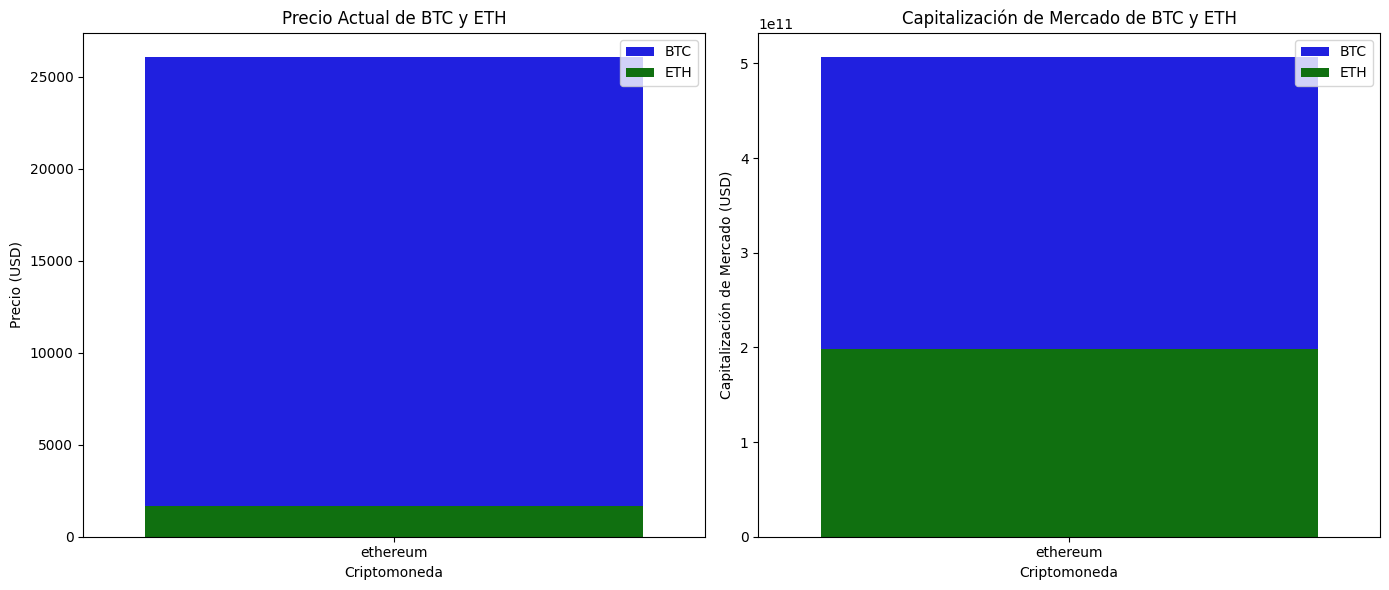

In [6]:
# Filtrar los datos para BTC y ETH
btc_data = df[df['id'] == 'bitcoin']
eth_data = df[df['id'] == 'ethereum']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de barras para el precio actual
sns.barplot(x='id', y='current_price', data=btc_data, ax=axes[0], color='blue', label='BTC')
sns.barplot(x='id', y='current_price', data=eth_data, ax=axes[0], color='green', label='ETH')
axes[0].set_title('Precio Actual de BTC y ETH')
axes[0].set_ylabel('Precio (USD)')
axes[0].set_xlabel('Criptomoneda')

# Gráfico de barras para la capitalización de mercado
sns.barplot(x='id', y='market_cap', data=btc_data, ax=axes[1], color='blue', label='BTC')
sns.barplot(x='id', y='market_cap', data=eth_data, ax=axes[1], color='green', label='ETH')
axes[1].set_title('Capitalización de Mercado de BTC y ETH')
axes[1].set_ylabel('Capitalización de Mercado (USD)')
axes[1].set_xlabel('Criptomoneda')

# Mostrar los gráficos
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()


### Analisis anterior en $ Argentino

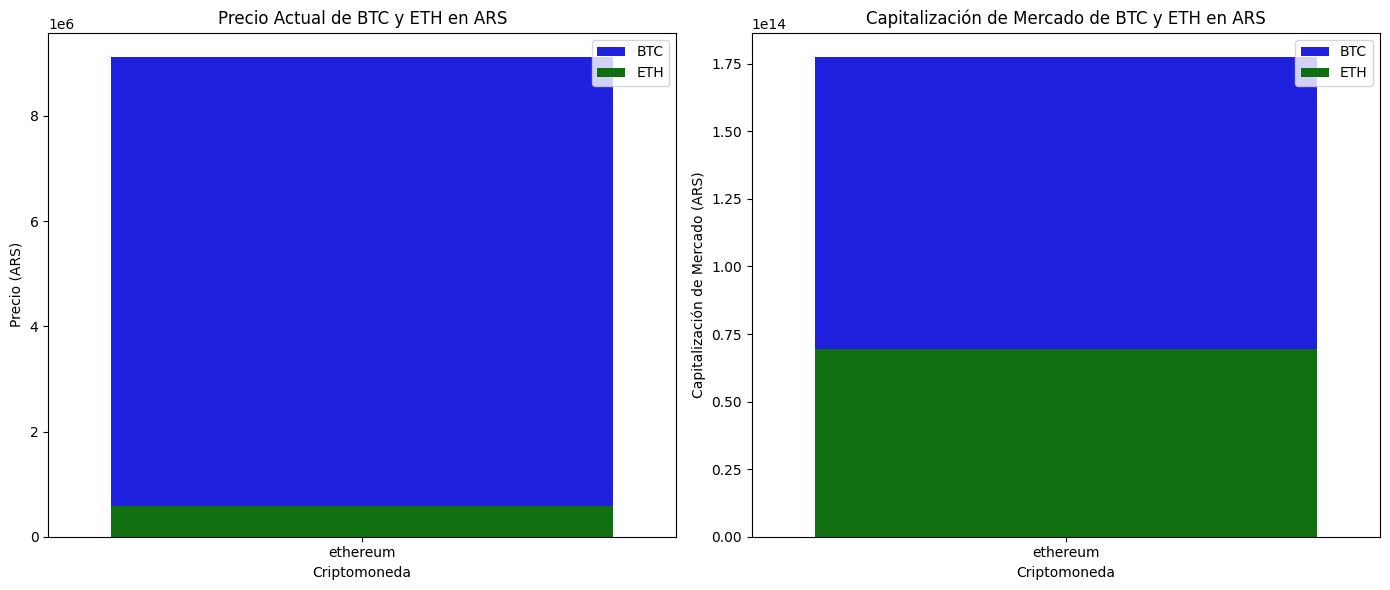

In [7]:
# Obtener los datos de CoinGecko
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "ars",  # Cambiar a "usd" si los precios ya están en USD
    "ids": "bitcoin,ethereum",  # BTC y ETH
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False
}

response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Filtrar los datos para BTC y ETH
btc_data = df[df['id'] == 'bitcoin']
eth_data = df[df['id'] == 'ethereum']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico de barras para el precio actual en ARS
sns.barplot(x='id', y='current_price', data=btc_data, ax=axes[0], color='blue', label='BTC')
sns.barplot(x='id', y='current_price', data=eth_data, ax=axes[0], color='green', label='ETH')
axes[0].set_title('Precio Actual de BTC y ETH en ARS')
axes[0].set_ylabel('Precio (ARS)')
axes[0].set_xlabel('Criptomoneda')

# Gráfico de barras para la capitalización de mercado en ARS
sns.barplot(x='id', y='market_cap', data=btc_data, ax=axes[1], color='blue', label='BTC')
sns.barplot(x='id', y='market_cap', data=eth_data, ax=axes[1], color='green', label='ETH')
axes[1].set_title('Capitalización de Mercado de BTC y ETH en ARS')
axes[1].set_ylabel('Capitalización de Mercado (ARS)')
axes[1].set_xlabel('Criptomoneda')

# Mostrar los gráficos
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()


Nota: La capitalización del mercado es un indicador que mide y sigue el valor de mercado de una criptomoneda. En general, cuanto más alta sea la capitalización del mercado de una criptomoneda, más dominante se considerará esta en el mismo.

# *Volumnen de operaciones
# *Cambios recientes

In [16]:
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",  # Cambiar a la moneda deseada si es necesario
    "ids": "bitcoin,ethereum",  # BTC y ETH
    "order": "market_cap_desc",  # Ordenar por capitalización de mercado descendente
    "per_page": 5,  # Limitamos a 5 para obtener los 5 principales
    "page": 1,  # Página 1
    "sparkline": False  # Sin gráfico de líneas
}

response = requests.get(url, params=params)
data = response.json()
df = pd.DataFrame(data)


##### Volumen de Operaciones Diario:

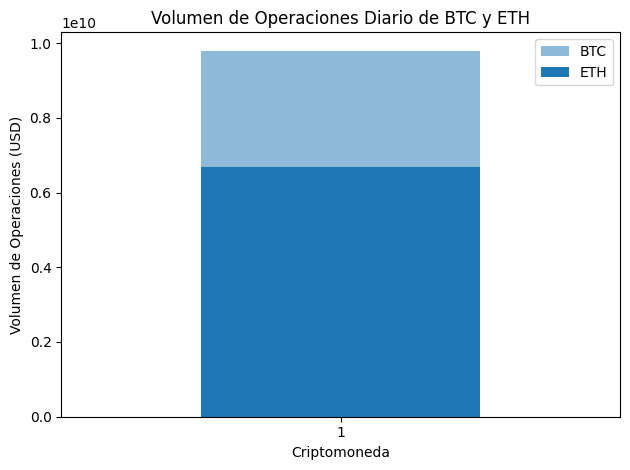

In [16]:
# Filtrar datos de volumen diario para BTC y ETH
volumen_btc = df[df['id'] == 'bitcoin']['total_volume']
volumen_eth = df[df['id'] == 'ethereum']['total_volume']

# Crear el gráfico de barras
fig, ax = plt.subplots()
volumen_btc.plot(kind='bar', x='name', y='total_volume', ax=ax, label='BTC', alpha=0.5)
volumen_eth.plot(kind='bar', x='name', y='total_volume', ax=ax, label='ETH', alpha=1)
ax.set_xlabel('Criptomoneda')
ax.set_ylabel('Volumen de Operaciones (USD)')
ax.set_title('Volumen de Operaciones Diario de BTC y ETH')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26108.00,508096401607,1,548107266337,10370162091,26536.00,...,2.100000e+07,21000000.0,69045.00,-62.16282,2021-11-10T14:24:11.849Z,67.810000,38426.73188,2013-07-06T00:00:00.000Z,None,2023-08-25T01:33:57.669Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1655.76,198980317229,2,198980317229,6802699951,1678.12,...,1.202142e+08,NaN,4878.26,-66.05816,2021-11-10T14:24:19.604Z,0.432979,382313.86634,2015-10-20T00:00:00.000Z,"{'times': 83.8071856276218, 'currency': 'btc',...",2023-08-25T01:34:00.707Z


##### Cambios Recientes en el Precio:

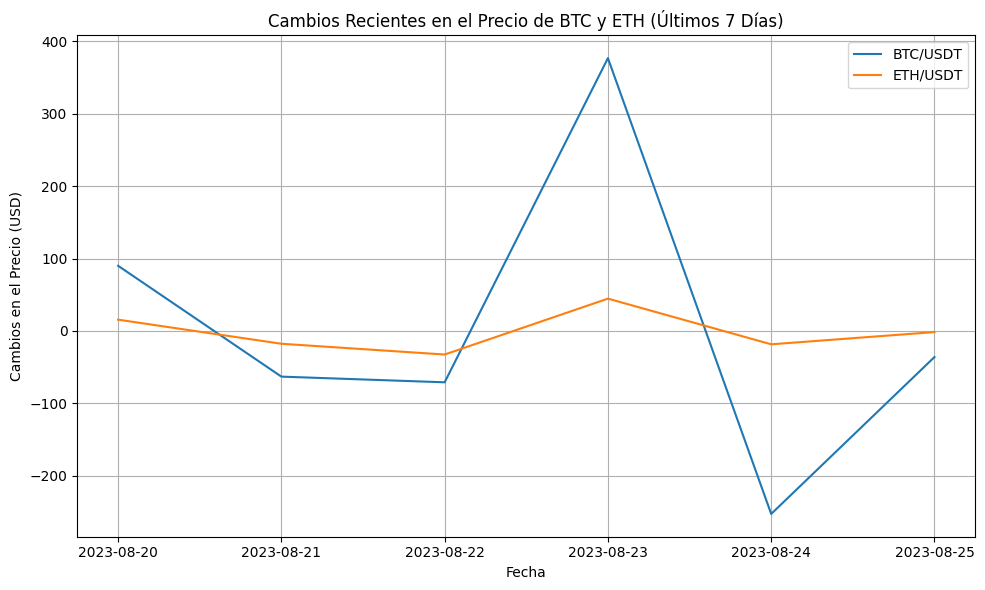

In [1]:
# Crear una instancia del intercambio (Exchange)
exchange = ccxt.binance()  # Puedes cambiar a otro intercambio si lo prefieres

# Símbolos de Bitcoin (BTC) y Ethereum (ETH)
symbols = ['BTC/USDT', 'ETH/USDT']

# Obtener datos de precios históricos para BTC y ETH
historical_prices = {}
for symbol in symbols:
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe='1d', limit=7)  # Obtener últimos 7 días
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    historical_prices[symbol] = df

# Calcular cambios recientes en el precio
changes = {}
for symbol, df in historical_prices.items():
    df['price_change'] = df['close'].diff()  # Calcular cambios diarios en el precio
    changes[symbol] = df['price_change']

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for symbol, change in changes.items():
    plt.plot(change.index, change.values, label=symbol)

plt.xlabel('Fecha')
plt.ylabel('Cambios en el Precio (USD)')
plt.title('Cambios Recientes en el Precio de BTC y ETH (Últimos 7 Días)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Distribución de Cambios Porcentuales Diarios:

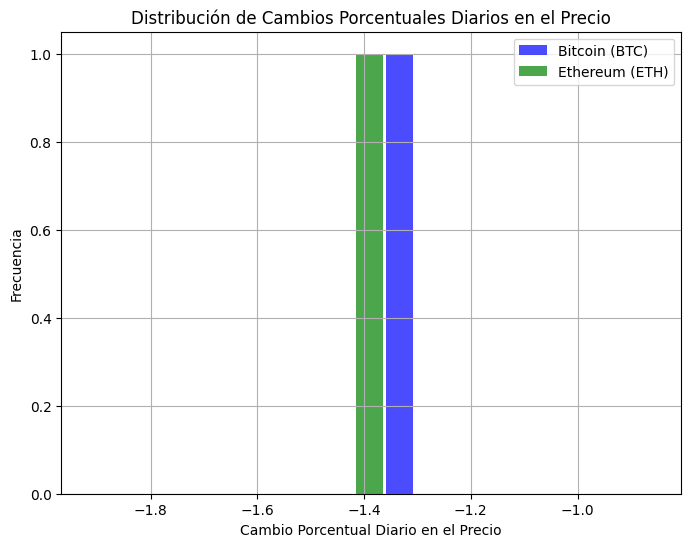

In [5]:
# Obtener datos de mercado de CoinGecko
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "ids": "bitcoin,ethereum",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
}
response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Crear una figura y ejes para el gráfico
plt.figure(figsize=(8, 6))

# Crear un histograma con los cambios porcentuales diarios para Bitcoin (BTC)
plt.hist(df['price_change_percentage_24h'][df['id'] == 'bitcoin'], bins=20, alpha=0.7, color='blue', label='Bitcoin (BTC)')

# Crear un histograma con los cambios porcentuales diarios para Ethereum (ETH)
plt.hist(df['price_change_percentage_24h'][df['id'] == 'ethereum'], bins=20, alpha=0.7, color='green', label='Ethereum (ETH)')

# Personalizar el gráfico
plt.xlabel('Cambio Porcentual Diario en el Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cambios Porcentuales Diarios en el Precio')
plt.legend()
plt.grid(True)

# Mostrar el histograma
plt.show()


Nota : Distribución de Cambios porcentuales: Utiliza un histograma para mostrar cómo se distribuyen los cambios porcentuales diarios en el precio de BTC y ETH.

##### Correlacion entre precios de las monedas en analisis

C:\Users\Pc - Jujuy\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Pc - Jujuy\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


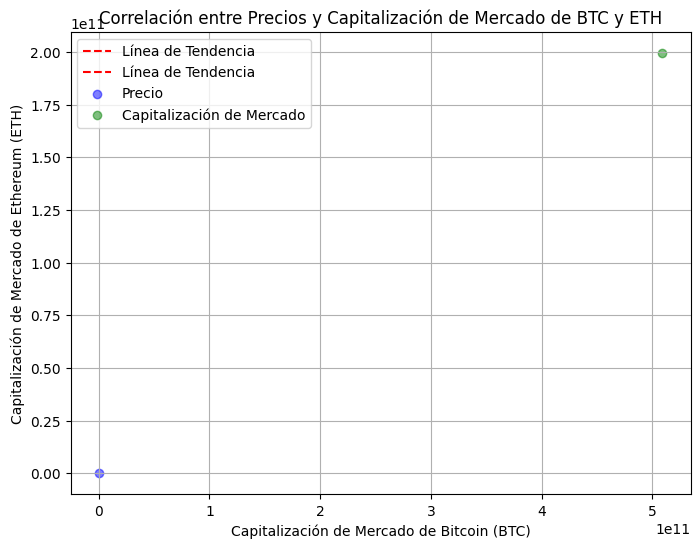

Correlación entre Precios: nan
Correlación entre Capitalización de Mercado: nan


In [8]:
# Obtener datos de mercado de CoinGecko
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "ids": "bitcoin,ethereum",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
}
response = requests.get(url, params=params)
data = response.json()

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Filtrar datos de Bitcoin (BTC) y Ethereum (ETH)
btc_data = df[df['id'] == 'bitcoin'][['current_price', 'market_cap']]
eth_data = df[df['id'] == 'ethereum'][['current_price', 'market_cap']]

# Calcular la correlación entre los precios y la capitalización de mercado
correlation_price = btc_data['current_price'].corr(eth_data['current_price'])
correlation_market_cap = btc_data['market_cap'].corr(eth_data['market_cap'])

# Crear una figura y ejes para el gráfico de dispersión
plt.figure(figsize=(8, 6))

# Crear un gráfico de dispersión para la correlación entre precios
plt.scatter(btc_data['current_price'], eth_data['current_price'], alpha=0.5, color='blue', label='Precio')
plt.xlabel('Precio de Bitcoin (BTC)')
plt.ylabel('Precio de Ethereum (ETH)')

# Agregar línea de tendencia
z = np.polyfit(btc_data['current_price'], eth_data['current_price'], 1)
p = np.poly1d(z)
plt.plot(btc_data['current_price'], p(btc_data['current_price']), "r--", label='Línea de Tendencia')

# Crear un gráfico de dispersión para la correlación entre capitalización de mercado
plt.scatter(btc_data['market_cap'], eth_data['market_cap'], alpha=0.5, color='green', label='Capitalización de Mercado')
plt.xlabel('Capitalización de Mercado de Bitcoin (BTC)')
plt.ylabel('Capitalización de Mercado de Ethereum (ETH)')

# Agregar línea de tendencia
z = np.polyfit(btc_data['market_cap'], eth_data['market_cap'], 1)
p = np.poly1d(z)
plt.plot(btc_data['market_cap'], p(btc_data['market_cap']), "r--", label='Línea de Tendencia')

# Personalizar el gráfico
plt.legend()
plt.title('Correlación entre Precios y Capitalización de Mercado de BTC y ETH')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Mostrar la correlación calculada
print(f'Correlación entre Precios: {correlation_price:.2f}')
print(f'Correlación entre Capitalización de Mercado: {correlation_market_cap:.2f}')


##### Análisis de Tendencia en el Precio de BTC y ETH

nota: Para realizar un análisis de tendencia a largo plazo, puedes utilizar gráficos de líneas que muestren la evolución de los precios de Bitcoin (BTC) y Ethereum (ETH) a lo largo del tiempo.

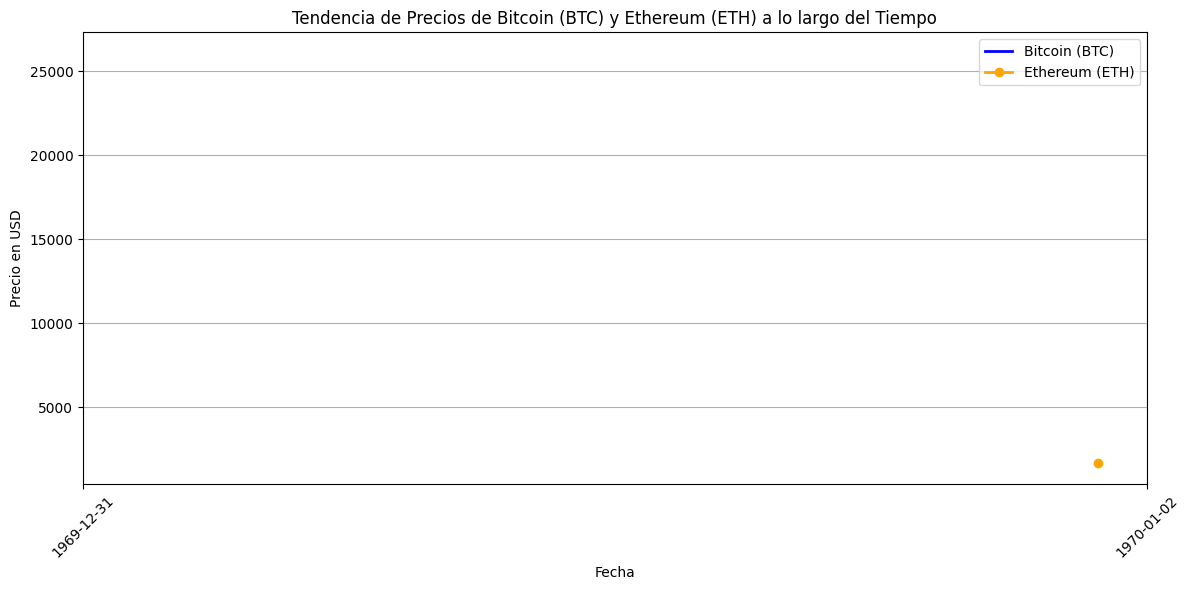

In [20]:
# Supongamos que ya tienes cargados los datos en un DataFrame llamado 'df'

# Crear una figura y ejes para el gráfico de tendencia
plt.figure(figsize=(12, 6))

# Obtener los datos de Bitcoin (BTC) y Ethereum (ETH)
bitcoin_data = df[df['id'] == 'bitcoin']
ethereum_data = df[df['id'] == 'ethereum']

# Formatear las fechas en el eje x
date_fmt = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Espaciado de 7 días

# Graficar el precio de Bitcoin (BTC) a lo largo del tiempo en azul
plt.plot(bitcoin_data['last_updated'], bitcoin_data['current_price'], 'b-', label='Bitcoin (BTC)', linewidth=2)

# Graficar el precio de Ethereum (ETH) a lo largo del tiempo en naranja
plt.plot(ethereum_data['last_updated'], ethereum_data['current_price'], 'o-', label='Ethereum (ETH)', color='orange', linewidth=2)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.title('Tendencia de Precios de Bitcoin (BTC) y Ethereum (ETH) a lo largo del Tiempo')
plt.legend()
plt.grid(True)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### a ver grafico alternativo de tendencia de precios 

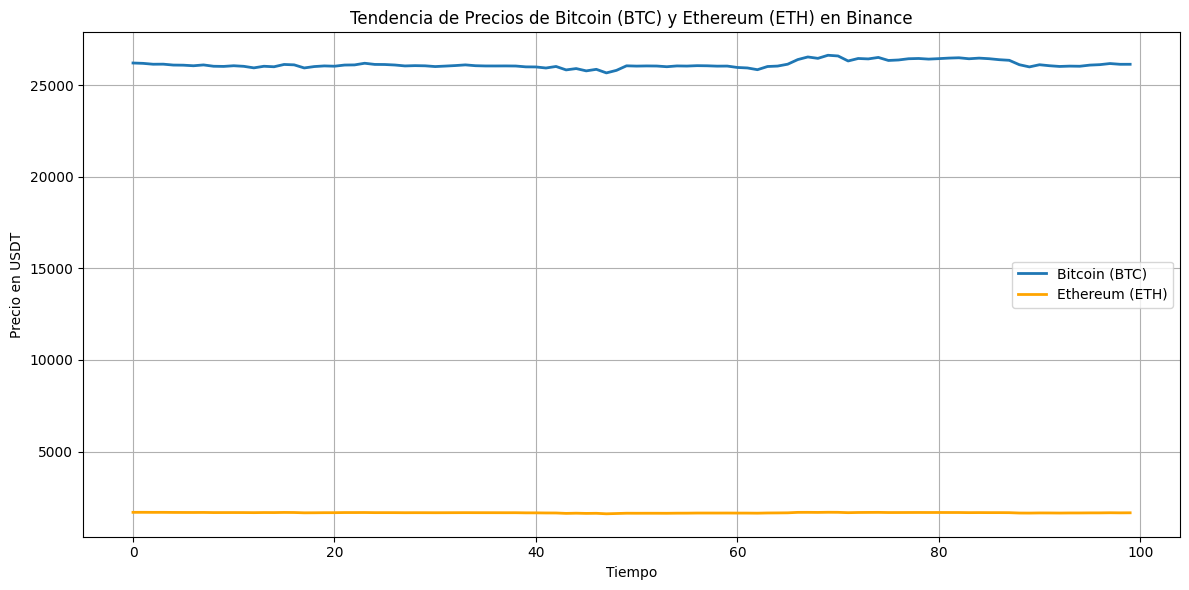

In [21]:
# Crear una instancia del intercambio (exchange)
exchange = ccxt.binance()

# Definir el par de negociación (BTC/USDT y ETH/USDT)
symbol_btc = 'BTC/USDT'
symbol_eth = 'ETH/USDT'

# Obtener datos de precios históricos (por ejemplo, las últimas 100 velas de 1 hora)
limit = 100
ohlcv_btc = exchange.fetch_ohlcv(symbol_btc, timeframe='1h', limit=limit)
ohlcv_eth = exchange.fetch_ohlcv(symbol_eth, timeframe='1h', limit=limit)

# Extraer precios de cierre
prices_btc = [candle[4] for candle in ohlcv_btc]
prices_eth = [candle[4] for candle in ohlcv_eth]

# Crear una figura y ejes para el gráfico de tendencia
plt.figure(figsize=(12, 6))

# Graficar el precio de Bitcoin (BTC) a lo largo del tiempo en azul
plt.plot(prices_btc, label='Bitcoin (BTC)', linewidth=2)

# Graficar el precio de Ethereum (ETH) a lo largo del tiempo en naranja
plt.plot(prices_eth, label='Ethereum (ETH)', color='orange', linewidth=2)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Precio en USDT')
plt.title('Tendencia de Precios de Bitcoin (BTC) y Ethereum (ETH) en Binance')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Identificación de Picos y Valles: Utiliza gráficos de líneas para identificar picos y valles en el precio de BTC y ETH.

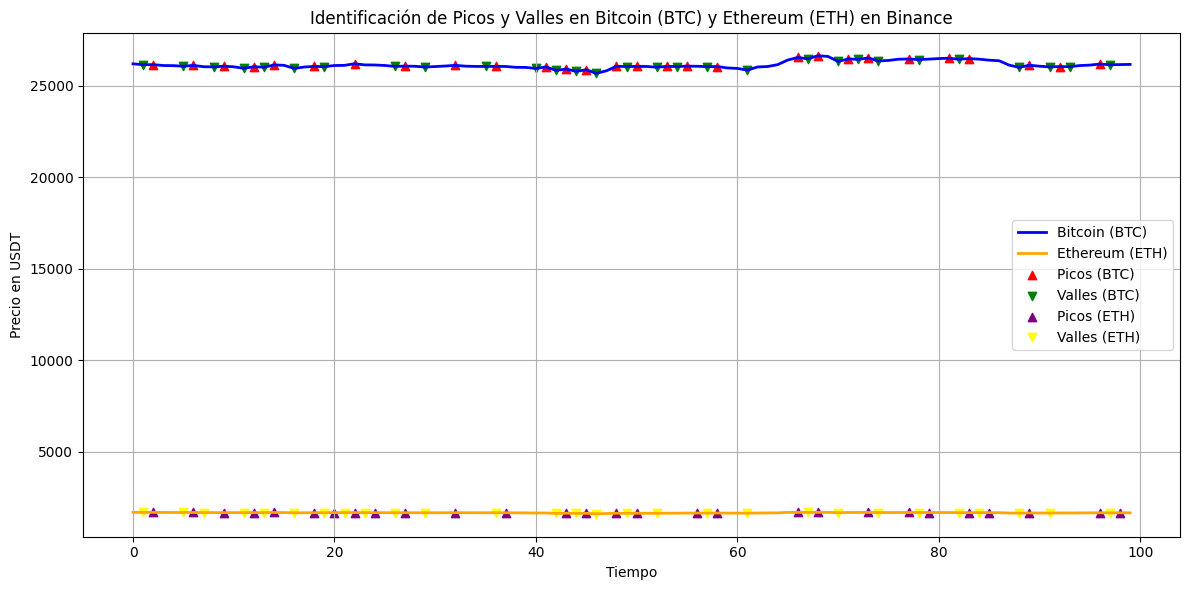

In [22]:
# Crear una instancia del intercambio (exchange)
exchange = ccxt.binance()

# Definir el par de negociación (BTC/USDT y ETH/USDT)
symbol_btc = 'BTC/USDT'
symbol_eth = 'ETH/USDT'

# Obtener datos de precios históricos (por ejemplo, las últimas 100 velas de 1 hora)
limit = 100
ohlcv_btc = exchange.fetch_ohlcv(symbol_btc, timeframe='1h', limit=limit)
ohlcv_eth = exchange.fetch_ohlcv(symbol_eth, timeframe='1h', limit=limit)

# Extraer precios de cierre
prices_btc = [candle[4] for candle in ohlcv_btc]
prices_eth = [candle[4] for candle in ohlcv_eth]

# Crear una figura y ejes para el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar el precio de Bitcoin (BTC) a lo largo del tiempo en azul
plt.plot(prices_btc, label='Bitcoin (BTC)', color='blue', linewidth=2)

# Graficar el precio de Ethereum (ETH) a lo largo del tiempo en naranja
plt.plot(prices_eth, label='Ethereum (ETH)', color='orange', linewidth=2)

# Identificar picos y valles
peak_indices_btc = [i for i in range(1, len(prices_btc)-1) if prices_btc[i] > prices_btc[i-1] and prices_btc[i] > prices_btc[i+1]]
valley_indices_btc = [i for i in range(1, len(prices_btc)-1) if prices_btc[i] < prices_btc[i-1] and prices_btc[i] < prices_btc[i+1]]

peak_indices_eth = [i for i in range(1, len(prices_eth)-1) if prices_eth[i] > prices_eth[i-1] and prices_eth[i] > prices_eth[i+1]]
valley_indices_eth = [i for i in range(1, len(prices_eth)-1) if prices_eth[i] < prices_eth[i-1] and prices_eth[i] < prices_eth[i+1]]

# Graficar picos y valles
plt.scatter(peak_indices_btc, [prices_btc[i] for i in peak_indices_btc], color='red', marker='^', label='Picos (BTC)')
plt.scatter(valley_indices_btc, [prices_btc[i] for i in valley_indices_btc], color='green', marker='v', label='Valles (BTC)')

plt.scatter(peak_indices_eth, [prices_eth[i] for i in peak_indices_eth], color='purple', marker='^', label='Picos (ETH)')
plt.scatter(valley_indices_eth, [prices_eth[i] for i in valley_indices_eth], color='yellow', marker='v', label='Valles (ETH)')

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Precio en USDT')
plt.title('Identificación de Picos y Valles en Bitcoin (BTC) y Ethereum (ETH) en Binance')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


KPIs (Indicadores Clave de Desempeño) relacionados con el análisis de datos de criptomonedas que se puede trabajar en Visual Studio Code y luego representar visualmente en Power BI

1- KPI: Capitalización de Mercado Total
Descripción: Este KPI representa la capitalización de mercado total de todas las criptomonedas en estudio. Es una medida de la valoración total del mercado de criptomonedas y puede ayudar a identificar tendencias generales.


In [23]:
# URL de la fuente de datos
url = "https://api.coingecko.com/api/v3/coins/markets"

# Parámetros de la solicitud
params = {
    "vs_currency": "usd",  # Puedes cambiar a otra moneda si lo deseas
    "ids": "bitcoin,ethereum",  # BTC y ETH
    "order": "market_cap_desc",  # Ordenar por capitalización de mercado descendente
    "per_page": 5,  # Las 5 principales monedas (puedes cambiar esto)
    "page": 1,
    "sparkline": "false",  # No necesitamos la información detallada
}

# Realizar la solicitud a la API
response = requests.get(url, params=params)
data = response.json()

# Calcular la Capitalización de Mercado Total
market_cap_total = sum([entry["market_cap"] for entry in data])

# Imprimir el resultado
print(f"Capitalización de Mercado Total: ${market_cap_total}")


Capitalización de Mercado Total: $708660421290


2- KPI: Cambio Porcentual Diario Promedio

Descripción: Este KPI muestra el cambio porcentual promedio en el precio de todas las criptomonedas en un período de tiempo diario. Ayuda a identificar la volatilidad del mercado.

In [24]:
# URL de la fuente de datos
url = "https://api.coingecko.com/api/v3/coins/markets"

# Parámetros de la solicitud
params = {
    "vs_currency": "usd",  # Puedes cambiar a otra moneda si lo deseas
    "ids": "bitcoin,ethereum",  # BTC y ETH
    "order": "market_cap_desc",  # Ordenar por capitalización de mercado descendente
    "per_page": 5,  # Las 5 principales monedas (puedes cambiar esto)
    "page": 1,
    "sparkline": "false",  # No necesitamos la información detallada
}

# Realizar la solicitud a la API
response = requests.get(url, params=params)
data = response.json()

# Calcular el Cambio Porcentual Diario Promedio
daily_change_avg_btc = sum([entry["price_change_percentage_24h"] for entry in data if entry["id"] == "bitcoin"]) / len(data)
daily_change_avg_eth = sum([entry["price_change_percentage_24h"] for entry in data if entry["id"] == "ethereum"]) / len(data)

# Imprimir los resultados
print(f"Cambio Porcentual Diario Promedio de BTC: {daily_change_avg_btc:.2f}%")
print(f"Cambio Porcentual Diario Promedio de ETH: {daily_change_avg_eth:.2f}%")


Cambio Porcentual Diario Promedio de BTC: -0.45%
Cambio Porcentual Diario Promedio de ETH: -0.45%


3- KPI: Volumen de Operaciones Total

•	Descripción: Este KPI muestra el volumen total de operaciones de todas las criptomonedas en tu conjunto de datos. Es una medida de la liquidez del mercado

In [25]:

# URL de la fuente de datos
url = "https://api.coingecko.com/api/v3/coins/markets"

# Parámetros de la solicitud
params = {
    "vs_currency": "usd",  # Puedes cambiar a otra moneda si lo deseas
    "ids": "bitcoin,ethereum",  # BTC y ETH
    "order": "market_cap_desc",  # Ordenar por capitalización de mercado descendente
    "per_page": 5,  # Las 5 principales monedas (puedes cambiar esto)
    "page": 1,
    "sparkline": "false",  # No necesitamos la información detallada
}

# Realizar la solicitud a la API
response = requests.get(url, params=params)
data = response.json()

# Calcular el Volumen de Operaciones Total
total_volume_btc = sum([entry["total_volume"] for entry in data if entry["id"] == "bitcoin"])
total_volume_eth = sum([entry["total_volume"] for entry in data if entry["id"] == "ethereum"])

# Imprimir los resultados
print(f"Volumen de Operaciones Total de BTC: ${total_volume_btc:.2f}")
print(f"Volumen de Operaciones Total de ETH: ${total_volume_eth:.2f}")


Volumen de Operaciones Total de BTC: $9461733244.00
Volumen de Operaciones Total de ETH: $6872114018.00


##### ANALICEMOS 2 MONEDAS MAS...continuemos Eda_Criptomoneda2